In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('Position_Salaries.csv')
x = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values

In [3]:
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [4]:
#linear regression model
from sklearn.linear_model import LinearRegression
linreg1 = LinearRegression()
linreg1.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [5]:
#polynomial regression 
from sklearn.preprocessing import PolynomialFeatures
polyreg = PolynomialFeatures(degree = 5)
x_poly = polyreg.fit_transform(x);

In [6]:
linreg2 = LinearRegression()
linreg2.fit(x_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Text(0.5, 1.0, 'Finding Salary Bluff')

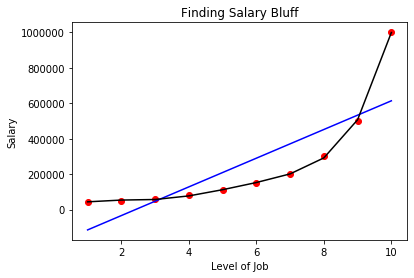

In [7]:
plt.scatter(x,y, color='red')
plt.plot(x, linreg1.predict(x), color='blue')
plt.plot(x, linreg2.predict(x_poly), color='black')
plt.xlabel('Level of Job')
plt.ylabel('Salary')
plt.title('Finding Salary Bluff')

### Better visualisation of the result (Higher resolution)

In [8]:
x_grid = np.arange(min(x), max(x), 0.1)
x_grid = x_grid.reshape(len(x_grid), 1)

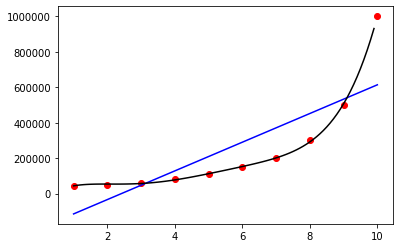

In [9]:
plt.scatter(x,y, color='red')
plt.plot(x, linreg1.predict(x), color='blue')
plt.plot(x_grid, linreg2.predict(polyreg.fit_transform(x_grid)), color='black')

In [10]:
'''
This model can be used to predict the salaries of employees based on their level of job
and can be used by HR to determine whether a candidate is telling truth about his previous 
salary or not
''';

In [11]:
np.random.seed(0)
x =2-3*np.random.normal(0,1,10)
y = x- x**2 -4*x + 5
#help(np.random.normal)
x = x[:, np.newaxis]
y = y[:, np.newaxis]

In [12]:
linreg = LinearRegression()
linreg.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

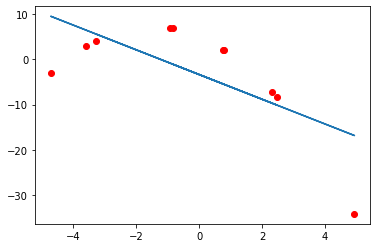

In [13]:
plt.scatter(x,y, color='red')
plt.plot(x, linreg.predict(x))
plt.show()

In [14]:
polyreg = PolynomialFeatures(degree=4)
xpoly = polyreg.fit_transform(x)

In [15]:
linreg2 = LinearRegression()
linreg2.fit(xpoly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

[3 4 0 2 6 9 1 8 7 5]


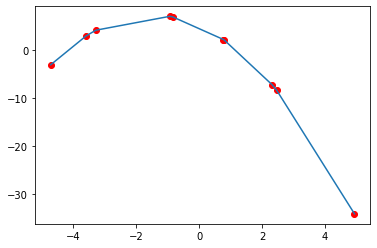

In [48]:
plt.scatter(x, y, color='red')
sidx = np.argsort(x[:,0])    
#argsort does indirect sorting and then stores the index of the sorted array
print(sidx)

plt.plot(x[sidx], linreg2.predict(xpoly)[sidx])
#plt.plot(x, linreg2.predict(xpoly))             #plot without sorting
plt.show()

In [17]:
np.random.seed(0)
x =2-3*np.random.normal(0,1,20)
y = x- x**2 -4*x + 1.5 + 3*(x**3)
#help(np.random.normal)
x = x[:, np.newaxis]
y = y[:, np.newaxis]

In [18]:
linreg = LinearRegression()
linreg.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

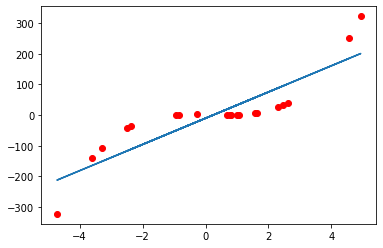

In [19]:
plt.scatter(x,y, color='red')
plt.plot(x, linreg.predict(x))
plt.show()

In [20]:
polyreg = PolynomialFeatures(degree=3)
xpoly = polyreg.fit_transform(x)

In [21]:
linreg2 = LinearRegression()
linreg2.fit(xpoly, y)
y_poly_pred = linreg2.predict(xpoly)

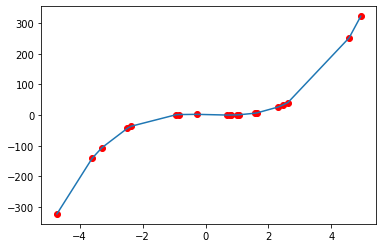

In [22]:
import operator
plt.scatter(x, y, color='red')
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred)
plt.show()

10.120437473614711
0.8537647164420812


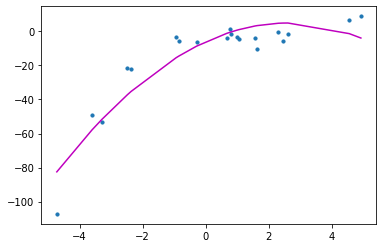

In [23]:
import operator

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

np.random.seed(0)
x = 2 - 3 * np.random.normal(0, 1, 20)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 20)

# transforming the data to include another axis
x = x[:, np.newaxis]
y = y[:, np.newaxis]

polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)
print(rmse)
print(r2)

plt.scatter(x, y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred, color='m')
plt.show()

https://discordapp.com/channels/244230771232079873/244238578400362498/704899862780444692
    

[[  5.56976407]
 [ -5.58376427]
 [ -0.85230295]
 [  9.4692266 ]
 [  6.41620241]
 [-16.84801829]
 [ -1.08659058]
 [-10.09388495]
 [ -9.70022381]
 [ -5.49837848]]
[[-3.29215704]
 [ 0.79952837]
 [-0.93621395]
 [-4.7226796 ]
 [-3.60267397]
 [ 4.93183364]
 [-0.85026525]
 [ 2.45407162]
 [ 2.30965656]
 [ 0.76820449]]
[[ 1.         -3.29215704 10.83829796]
 [ 1.          0.79952837  0.63924562]
 [ 1.         -0.93621395  0.87649656]
 [ 1.         -4.7226796  22.30370258]
 [ 1.         -3.60267397 12.97925974]
 [ 1.          4.93183364 24.32298305]
 [ 1.         -0.85026525  0.722951  ]
 [ 1.          2.45407162  6.02246754]
 [ 1.          2.30965656  5.3345134 ]
 [ 1.          0.76820449  0.59013814]]
[[  4.03817315]
 [  1.96216925]
 [  6.93214529]
 [ -3.13566379]
 [  2.82876217]
 [-34.11848397]
 [  6.82784476]
 [ -8.38468241]
 [ -7.26348307]
 [  2.10524837]]


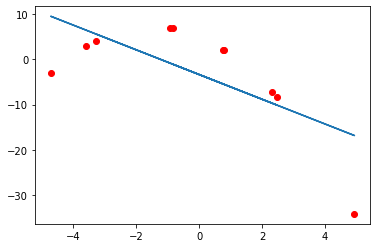

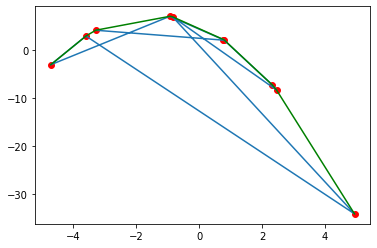

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

np.random.seed(0)

x = 2 - 3 * np.random.normal(0, 1, 10)
# x = np.sort(x)
y = x - x ** 2 - 4 * x + 5
x = x[..., np.newaxis]
y = y[..., np.newaxis]

linreg = LinearRegression()
linreg.fit(x, y)
pred = linreg.predict(x)
print(pred)
fig, ax = plt.subplots()
ax.scatter(x, y, color="red")
ax.plot(x, pred)
fig.savefig("1.pdf")

polyreg = PolynomialFeatures()
xpoly = polyreg.fit_transform(x)
print(x)
print(xpoly)
linreg2 = LinearRegression()
linreg2.fit(xpoly, y)
pred2 = linreg2.predict(xpoly)
print(pred2)
fig, ax = plt.subplots()
ax.scatter(x, y, color="red", s=35)
ax.plot(x, pred2)
sortidx = np.argsort(x[:, 0])
ax.plot(x[sortidx], pred2[sortidx], color='green')
fig.savefig("2.pdf")